# Packages

In [1]:
import matplotlib.pyplot as plt #plotting
import numpy as np #vectorized operations
import pandas as pd #data analysis

import pandas_datareader as pdr #wrapper to import data
import datetime as dt #date-time objects

import statsmodels.api as sms ## X and Y are the inputs, their dimen need to match!!

import statsmodels.api as sm

import statsmodels.formula.api as sma

import seaborn as sns


# Functions

In [2]:
def close_to_close_returns(adj_close): # Adjusted Close prices
    return adj_close / adj_close.shift() - 1 # use the shift function to compute the daily returns

def multi_lin_least_squares_parameters(X, Y): # X is the matrix, Y is the column vector, we want to find \hat\beta
    X = sm.add_constant(X).values
    Y = Y.values
    if np.linalg.det(np.matmul(X.transpose(),X))==0: #linalg: linear algebra, np.matmul: marix multiplication
        return print('Data matrix is not invertible')
    else:
        return np.matmul(np.linalg.inv(np.matmul(X.transpose(),X)), np.matmul(X.transpose(),Y)) #(X^TX)^{-1}X^TY=\hat \beat
    
def multi_lin_best_fit_plane(X,Y):
    import statsmodels.api as sm
    X = sm.add_constant(X)
    params = multi_lin_least_squares_parameters(X,Y)
    Y_hat = np.matmul(X.values, params)
    return Y_hat


# Data

In [19]:
#Dow Jones
DataDow=pd.read_csv('./DowPrice.csv')
for i in [DataDow]:
    i['ret'] = close_to_close_returns(i['Close'])*100
DataDow=DataDow.dropna()
DataDow['logret']=np.log(np.abs(DataDow['ret']))
#DataDow['logret']=np.log(DataDow['ret'])
#DataDow=DataDow.dropna()

#Real GDP
DataGDP=pd.read_csv('./US-Monthly-GDP-History-Data.csv')
DataGDP=DataGDP.dropna()
DataGDP=DataGDP[95:349]
for i in [DataGDP]:
    i['Adj_RGDP'] = close_to_close_returns(i['Monthly Real GDP Index'])
DataGDP=DataGDP.dropna()
DataGDP.index = np.arange(1,len(DataGDP)+1)

#Unemployment
DataUE=pd.read_csv('./UNRATE.csv')
DataUE=DataUE[624:877]
DataUE.index = np.arange(1,len(DataUE)+1)

#Consumer Price Index
DataCPI=pd.read_csv('./CPIAUCSL.csv')
DataCPI=DataCPI[636:889]
DataCPI.index = np.arange(1,len(DataCPI)+1)

#Producer Price Index
DataPPI=pd.read_csv('./PPIACO.csv')
DataPPI=DataPPI[1044:1297]
DataPPI.index=np.arange(1,len(DataPPI)+1)


#Personal Consumption Expenditure
DataPCE=pd.read_csv('./PCE.csv')
DataPCE=DataPCE[492:745]
DataPCE.index=np.arange(1,len(DataPCE)+1)

DataReg=pd.DataFrame({'Date':DataDow['Date'],'price':DataDow['Close'],'RGDP':DataGDP['Monthly Real GDP Index'],'UE':DataUE['UNRATE'],'CPI':DataCPI['CPIAUCSL'],'PPI':DataPPI['PPIACO'],'PCE':DataPCE['PCE']})
DataReg1=pd.DataFrame({'price':DataDow['Close'],'RGDP':DataGDP['Monthly Real GDP Index'],'UE':DataUE['UNRATE'],'CPI':DataCPI['CPIAUCSL'],'PPI':DataPPI['PPIACO'],'PCE':DataPCE['PCE']})
Datalog=pd.DataFrame({'Date':DataDow['Date'],'price':DataDow['logret'],'RGDP':DataGDP['Monthly Real GDP Index'],'UE':DataUE['UNRATE'],'CPI':DataCPI['CPIAUCSL'],'PPI':DataPPI['PPIACO'],'PCE':DataPCE['PCE']})
#plt.plot(DataDow['Date'],DataDow['logret'],'.')
DataReg



<ipython-input-19-e9fcd65e9689>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataDow['logret']=np.log(np.abs(DataDow['ret']))


,Date,price,RGDP,UE,CPI,PPI,PCE
1,2000-01-31,10940.50,12857.908,4.0,169.300,128.3,6535.3
2,2000-02-29,10128.30,12920.764,4.1,170.000,129.8,6619.7
3,2000-03-31,10921.90,12993.210,4.0,171.000,130.8,6685.8
4,2000-04-30,10733.90,13156.939,3.8,170.900,130.7,6671.1
5,2000-05-31,10522.30,13141.686,4.0,171.200,131.6,6707.6
...,...,...,...,...,...,...,...
249,2020-09-30,27781.70,18833.535,7.8,260.149,195.5,14582.7
250,2020-10-31,26501.60,18946.111,6.9,260.462,196.5,14627.1
251,2020-11-30,29638.64,18711.035,6.7,260.927,198.3,14532.8
252,2020-12-31,30606.48,18702.817,6.7,261.560,200.6,14451.1


# Multi Linear Regression

In [4]:
ml_params2=multi_lin_least_squares_parameters(DataReg[['RGDP','UE','CPI','PPI','PCE']],DataReg['price'])
ml_params2



array([ 4.44871978e+04, -5.01362277e+00, -7.04261696e+02, -1.92828993e+01,
       -8.02156878e+01,  6.92907726e+00])

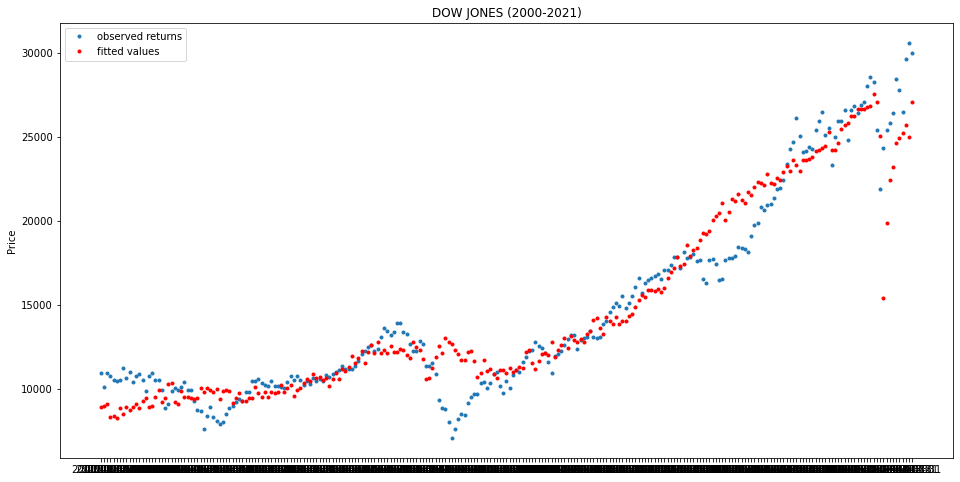

In [5]:
plt.figure(figsize=(16,8))
plt.title('DOW JONES (2000-2021)')
plt.ylabel('Price')
plt.plot(DataReg['Date'],DataReg['price'],'.',label='observed returns')
plt.plot(DataReg['Date'],multi_lin_best_fit_plane(DataReg[['RGDP','UE','CPI','PPI','PCE']], DataReg['price']),'r.', label='fitted values')
plt.legend();

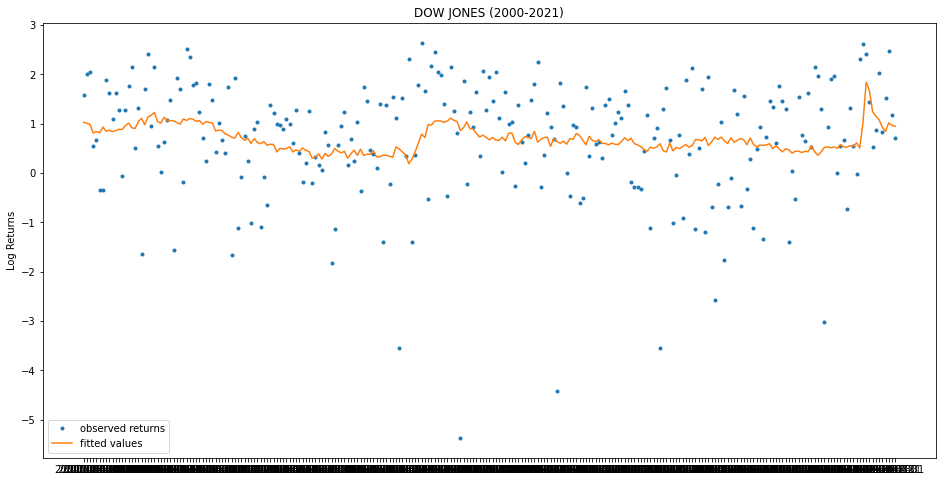

In [6]:
plt.figure(figsize=(16,8))
plt.title('DOW JONES (2000-2021)')
plt.ylabel('Log Returns')
plt.plot(DataDow['Date'],Datalog['price'],'.',label='observed returns')
plt.plot(DataDow['Date'],multi_lin_best_fit_plane(Datalog[['RGDP','UE','CPI','PPI','PCE']], Datalog['price']), label='fitted values')
plt.legend();

In [7]:
model2=sma.ols('price ~ RGDP + UE + CPI + PPI + PCE',DataReg).fit()
print(model2.params)

Intercept    44487.197831
RGDP            -5.013623
UE            -704.261696
CPI            -19.282899
PPI            -80.215688
PCE              6.929077
dtype: float64


In [8]:
model3=sma.ols('price ~ RGDP + UE + PCE + PPI + CPI',Datalog).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.202
Date:                Fri, 23 Apr 2021   Prob (F-statistic):             0.0547
Time:                        12:13:03   Log-Likelihood:                -400.18
No. Observations:                 253   AIC:                             812.4
Df Residuals:                     247   BIC:                             833.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8083      7.771      1.005      0.3

# Correlation Heat Map

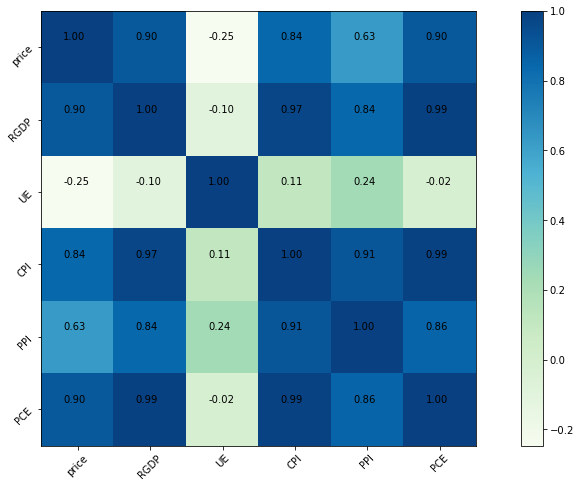

In [9]:
plt.figure(figsize=(16,8))
plt.imshow(DataReg1.corr(),cmap=plt.cm.GnBu,interpolation='nearest',data=True)
plt.colorbar()
tick_marks=[i for i in range(len(DataReg1.columns))]
plt.xticks(tick_marks,DataReg1.columns, rotation=45)
plt.yticks(tick_marks,DataReg1.columns, rotation=45)

for i in range(len(DataReg1.columns)):
    for j in range(len(DataReg1.columns)):
        text = '%.2f'%(DataReg1.corr().iloc[i,j])
        plt.text(i-0.2,j-0.1,text)

# Hypothesis Testing and Model Summary

Since the F-Stat is significantly large, we reject the null hypothesis that the beta coefficients are equal.

In [10]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     510.5
Date:                Fri, 23 Apr 2021   Prob (F-statistic):          5.52e-128
Time:                        12:13:04   Log-Likelihood:                -2247.0
No. Observations:                 253   AIC:                             4506.
Df Residuals:                     247   BIC:                             4527.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.449e+04   1.15e+04      3.869      0.0

In [11]:
model_CPI=sma.ols('price ~ RGDP + UE + PPI + PCE',DataReg).fit()
print(model_CPI.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     640.6
Date:                Fri, 23 Apr 2021   Prob (F-statistic):          2.11e-129
Time:                        12:13:04   Log-Likelihood:                -2247.0
No. Observations:                 253   AIC:                             4504.
Df Residuals:                     248   BIC:                             4522.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.235e+04   7405.385      5.719      0.0

In [12]:
model_CPI_PPI=sma.ols('price ~ RGDP + PCE + UE',DataReg).fit()
print(model_CPI_PPI.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     647.9
Date:                Fri, 23 Apr 2021   Prob (F-statistic):          2.84e-117
Time:                        12:13:05   Log-Likelihood:                -2279.0
No. Observations:                 253   AIC:                             4566.
Df Residuals:                     249   BIC:                             4580.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.546e+04   8197.408      6.765      0.0

# Residual Plots and Feature Selection

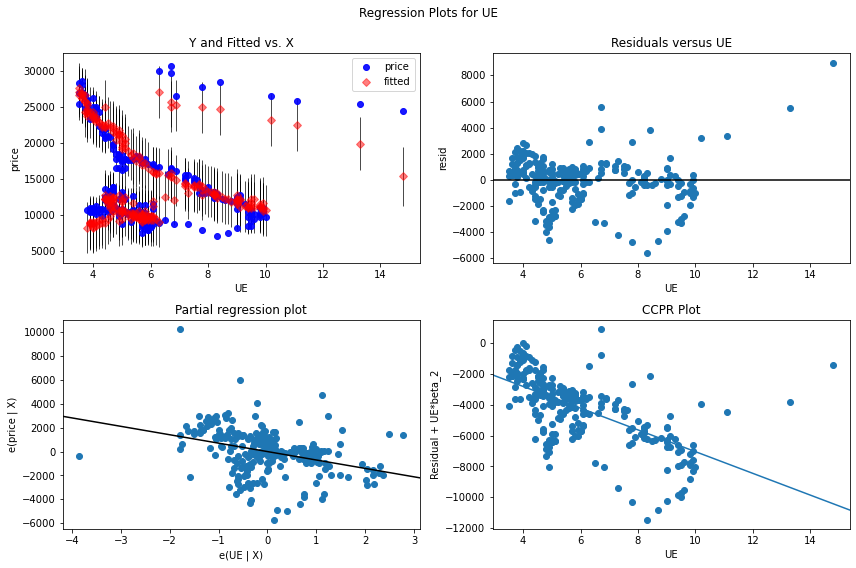

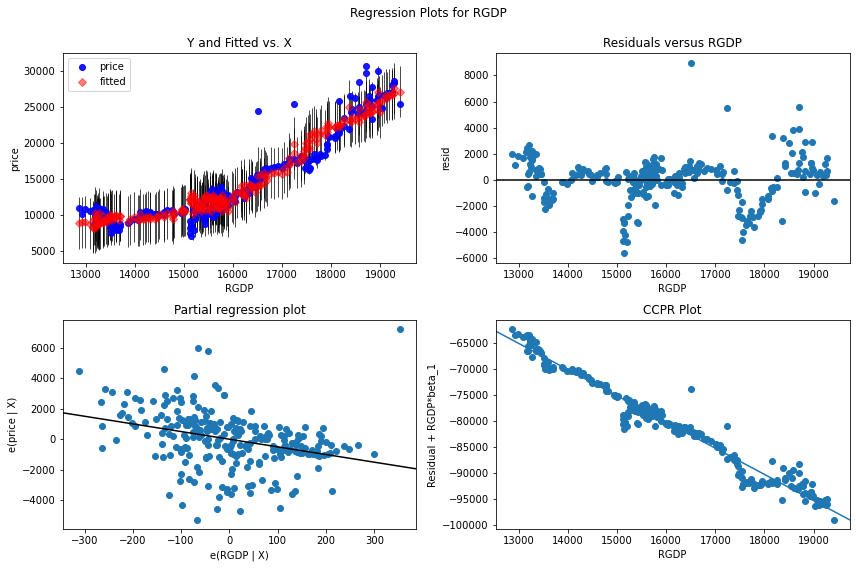

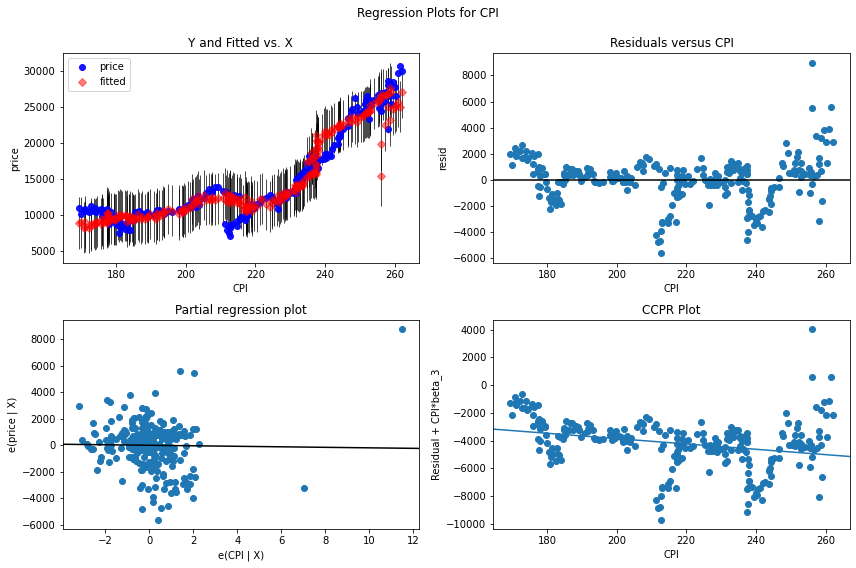

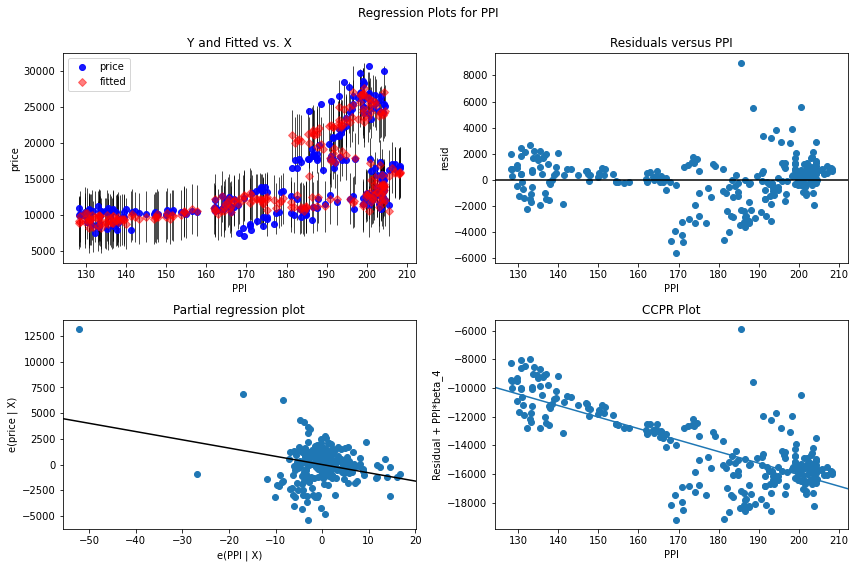

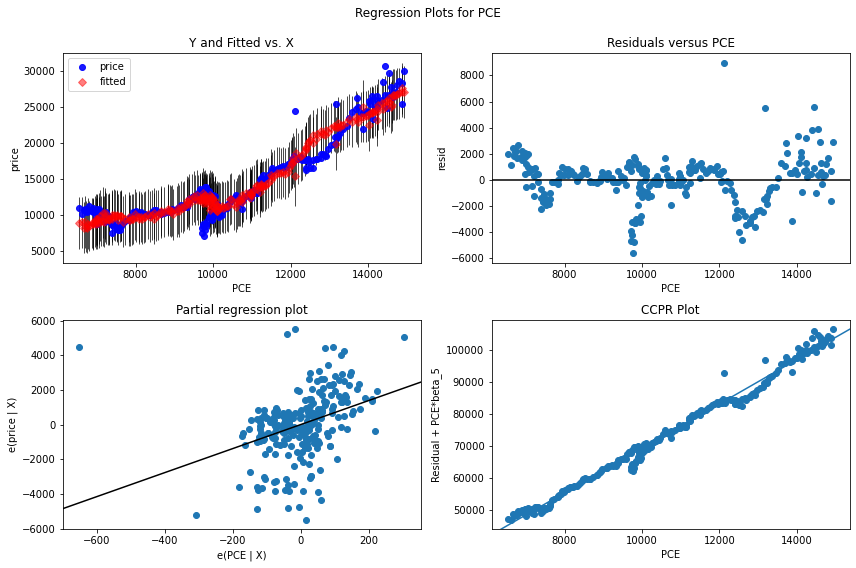

In [13]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'UE', fig=fig)

fig2 = plt.figure(figsize=(12,8))
fig2 = sm.graphics.plot_regress_exog(model2, 'RGDP', fig=fig2)

fig3 = plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_regress_exog(model2, 'CPI', fig=fig3)

fig4 = plt.figure(figsize=(12,8))
fig4 = sm.graphics.plot_regress_exog(model2, 'PPI', fig=fig4)

fig5 = plt.figure(figsize=(12,8))
fig5 = sm.graphics.plot_regress_exog(model2, 'PCE', fig=fig5)





# Pairwise Plots

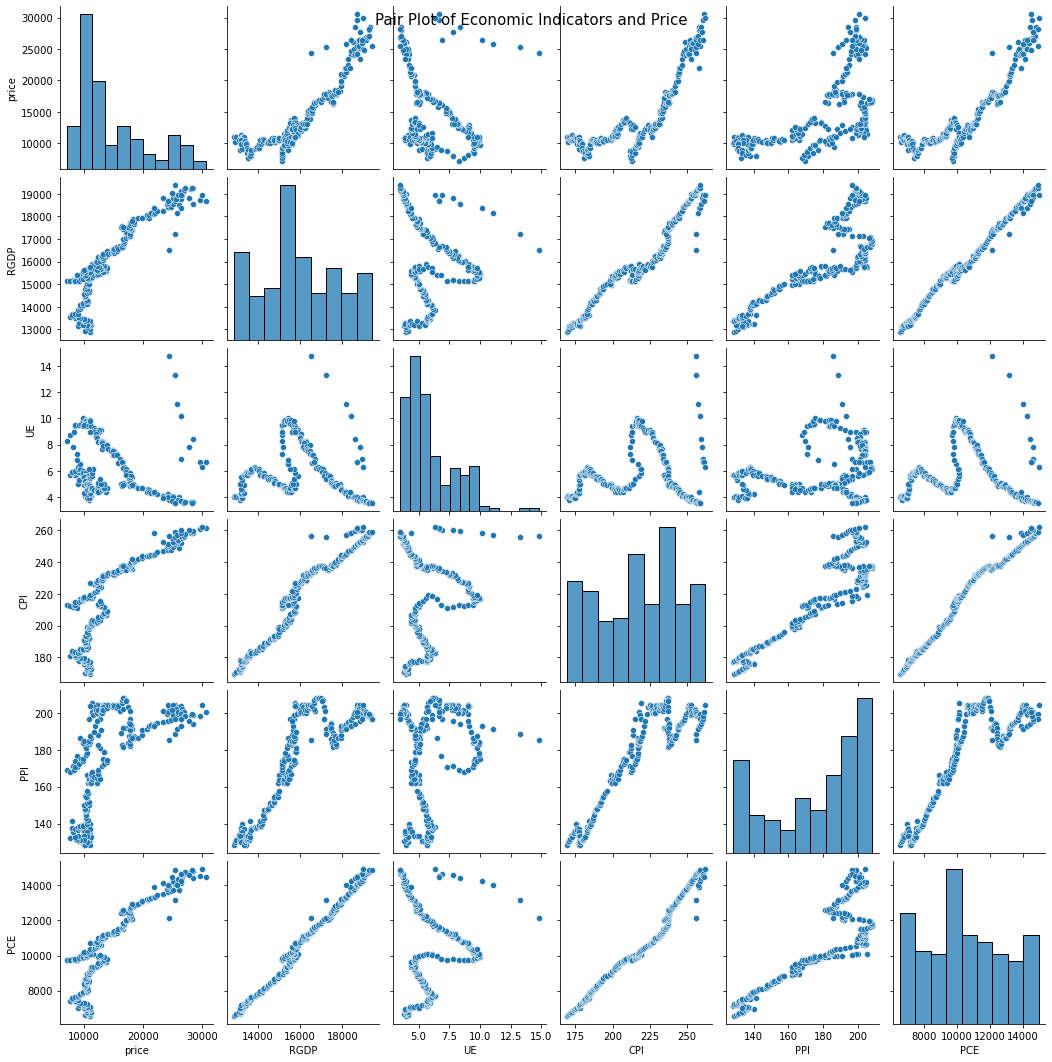

In [14]:

sns.pairplot(DataReg)
plt.suptitle('Pair Plot of Economic Indicators and Price', 
             size = 15);

In [96]:
from sklearn.model_selection import train_test_split
x=DataReg[['RGDP','UE','CPI','PPI','PCE']]
y=DataReg['price']
y1=Datalog['price']
x_train, x_test, y_train, y_test = train_test_split(x, y)
model = LinearRegression().fit(x_train, y_train)
print("Intercept: " + str(model.intercept_))
print("-------------------")
print("COEFFS: " + str(model.coef_))
print("-------------------")
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))



Intercept: 91186.51587354369
-------------------
COEFFS: [  -6.97473309 -553.48848391 -394.38061236   -1.25323474   11.80991061]
-------------------
0.9261622800632241
0.8146034436408576


In [97]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
print(model.score(x_train, y_train))

print(model.score(x_test, y_test))

#plt.scatter(x['UE'], y,color='g')
#plt.plot(x['UE'], model.predict(x),'.k')

#plt.show()

0.9981561445404004
0.979940518044517


In [98]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
print(model.score(x_train, y_train))

print(model.score(x_test, y_test))

0.9972818632929946
0.9813557795159253


In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y1)
model2 = LinearRegression().fit(x_train, y_train)
print("Intercept: " + str(model2.intercept_))
print("-------------------")
print("COEFFS: " + str(model2.coef_))
print("-------------------")

print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))





Intercept: 1.7135203505590453
-------------------
COEFFS: [-4.40535826e-04  5.78878313e-02  3.37939578e-02 -1.34863332e-02
  6.84252563e-05]
-------------------
0.04273416080224446
0.007229636842976839


In [104]:
model = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
print(model.score(x_train, y_train))

print(model.score(x_test, y_test))

0.7451004956656404
-0.2803125322052824


In [105]:
model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
print(model.score(x_train, y_train))

print(model.score(x_test, y_test))

0.8196798264261369
-0.2083363792525219


In [108]:
#plt.scatter(x['RGDP'], y,color='g')
#plt.plot(x['RGDP'], model.predict(x),'.k')

#plt.show()